In [1]:
%matplotlib inline
from matplotlib import pyplot
import scipy
import numpy
import scipy.signal

In [2]:
freq_per_value = 44100.0 / 1025
cutoff = int(300 / freq_per_value)
cutoff

6

In [3]:
signal = numpy.array([1] * cutoff + [0] * (1025 - cutoff * 2) + [1] * cutoff)
signal

array([1, 1, 1, ..., 1, 1, 1])

In [4]:
from filter import filters

In [5]:
filter_factory = filters.FilterFactory(44100, 1025)
impulse_response = filter_factory._read_ir_file('../measurements/tweaterleft1.txt', -0.001, 0.004)

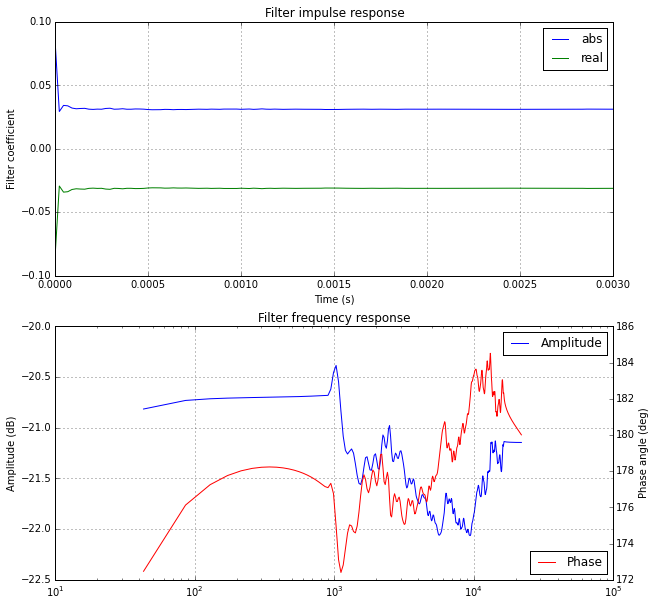

<invert_measurement filter for 44100hz sample freq with 1025 taps>

In [6]:
f = filter_factory.invert_measurement('../measurements/tweaterleft1.txt', (-0.001, 0.004), (1000, 18000))
f


(20, 22000)

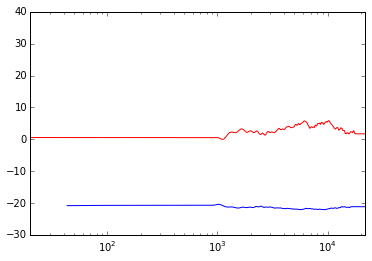

In [7]:
impulse_response = filter_factory._read_ir_file('../measurements/tweaterleft1.txt', -.001, 0.004)
sample_freq, new_fft = filter_factory._build_freq_response(impulse_response, 1000, 18000)

plot_items = len(new_fft) / 2

(freq, ampl) = scipy.signal.freqz(f.coefficients)
freq_hz = (freq * f.sample_freq / (2 * numpy.pi))
pyplot.semilogx(sample_freq[:plot_items],  20 * numpy.log10(numpy.abs(new_fft))[:plot_items] + 55, 'r-')
pyplot.semilogx(freq_hz, 20 * numpy.log10(numpy.abs(ampl)), 'b-')

pyplot.xlim(20, 22000)
#pyplot.ylim(-80, -40)







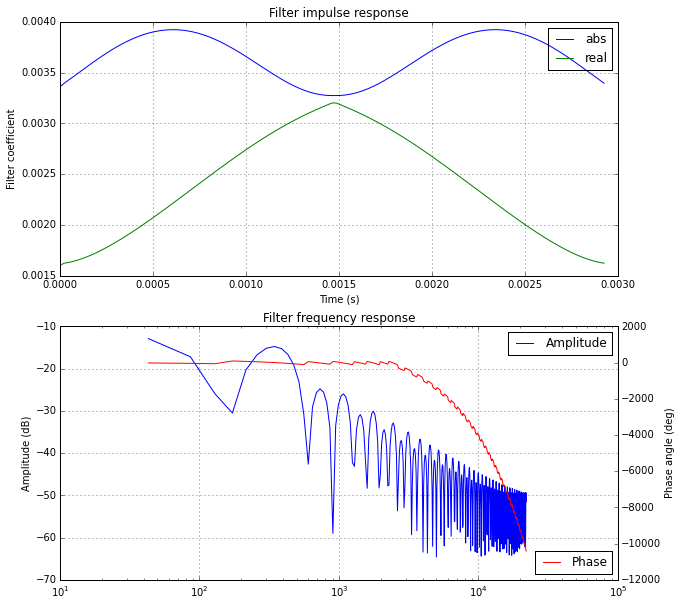

<invert_measurement_conv_remez filter for 44100hz sample freq with 129 taps: None * None>

In [9]:
g * f

In [ ]:
a

In [ ]:
x1 = scipy.signal.lfilter([1], x, scipy.randn(256))
AR, rho, ref = spectrum.arburg(x, len(a) - 1)

In [ ]:
[w,H] = scipy.signal.freqz(1, a, 256)
pyplot.plot(w, H, 'r')
[w,H2] = scipy.signal.freqz(1, a, 256)
pyplot.plot(w, H2, 'b')
pyplot.show()


In [ ]:

# Define AR filter coefficients
a = [1, -2.2137, 2.9403, -2.1697, 0.9606];
[w,H] = scipy.signal.freqz(1, a, 256)
Hp = pyplot.plot(w/numpy.pi, 20*numpy.log10(2*abs(H)/(2.*numpy.pi)),'r')
x = scipy.signal.lfilter([1], a, scipy.randn(256))
AR, rho, ref = spectrum.arburg(x, 4)
PSD = spectrum.arma2psd(AR, rho=rho, NFFT=512)
PSD = PSD[len(PSD):len(PSD)/2:-1]

pyplot.plot(numpy.linspace(0, 1, len(PSD)), 10*numpy.log10(abs(PSD)*2./(2.*numpy.pi)))

pyplot.xlabel(r'Normalized frequency (\times \pi rad/sample)')

In [ ]:
scipy.convolve(AR, AR)